# Sección 2 - Proyecto (1) - Alejandro Molina (T2)

## Paso 1: Cargar el conjunto de datos ”wine” de scikit-learn

### Líbrerias a utilizar:

In [82]:
import numpy as np 
import matplotlib.pyplot as plt

# load_wine es la funcion que nos permite cargar el dataset de wine
from sklearn.datasets import load_wine

# train_test_split es la funcion que nos permite dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# confusion_matrix es la funcion que nos permite crear la matriz de confusion
# ConfusionMatrixDisplay es la funcion que nos permite mostrar la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Perceptron es la funcion que nos permite crear el modelo de perceptron
from sklearn.linear_model import Perceptron

# Normalizer es la funcion que nos permite escalar los datos de entrada para mejorar el rendimiento del modelo
from sklearn.preprocessing import Normalizer


### Cargamos los datos:

In [83]:
# Cargamos el dataset de wine
wine = load_wine()

## Paso 2: Seleccionar las caracteristicas: "Alcohol", "magnesium" y "color intensity"

In [84]:
# Seleccionamos las columnas 0, 4 y 9 las cuales son respectivamente: Alcohol, Magnesium y color intensity
wineFiltered = wine.data[:, [0, 4, 9]]

### Graficamos los datos:

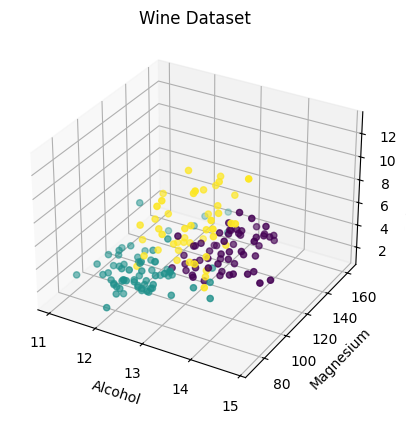

In [85]:
# Creamos una figura 3D
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')

# Graficamos los datos
ax.scatter(wineFiltered[:, 0], wineFiltered[:, 1], wineFiltered[:, 2], c=wine.target)

# Agregamos los nombres de los ejes
ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_zlabel('Color Intensity')

ax.set_title('Wine Dataset') # Agregamos el titulo

plt.show()

## Paso 3: Seleccionar de los datos anteriores, dos tipos de vino.

In [86]:
# En este caso seleccionaremos las clases 1 y 2
X = wineFiltered[wine.target != 0]
Y = wine.target[wine.target != 0]

### Graficamos los datos de los dos tipos de vino (1 y 2):

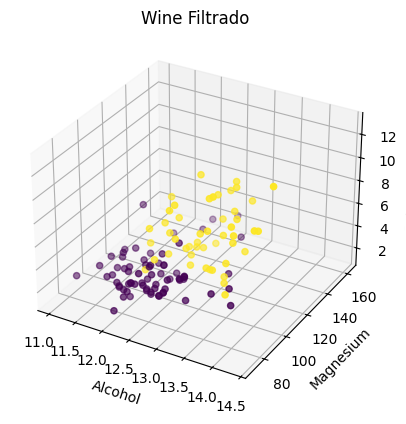

In [87]:
# Creamos una figura 3D
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')

# Graficamos los datos
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= Y)

# Agregamos los nombres de los ejes
ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_zlabel('Color Intensity')

ax.set_title('Wine Filtrado') # Agregamos el titulo

# Mostramos la figura
plt.show()

## Paso 4: Dividir la data en dos subconjuntos: entrenamiento y prueba.

In [88]:
# Escalamos los datos antes de dividir los datos en entrenamiento y prueba
scaler = Normalizer().fit(X)

# Guardamos los datos escalados en X_norm
X_norm = scaler.transform(X)

# Dividimos los datos en entrenamiento y prueba
# test_size es el porcentaje de datos que se van a usar para prueba (en este caso 30%)
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.30)

## Paso 5: Implementar un clasificador binario, basado en el algoritmo del "Perceptrón Simple".

### Creamos una clase para el perceptrón simple:

In [89]:
class PerceptronSimple:
    
    # Constructor de la clase
    def __init__(self, X_train, Y_train ,b=0.01, w=None, alpha=0.01):
        self.X_train = X_train
        self.Y_train = Y_train
        # Si no se especifica un valor para w, se inicializa con un valor de 0.01
        self.w = w if w is not None else np.full(X_train.shape[1], 0.01)
        self.b = b
        self.alpha = alpha

    # Propagación hacia adelante
    def forward_prop(self, row):
        y_hat = np.dot(self.X_train[row], self.w) + self.b
        # Utilizamos unique para obtener los valores unicos de Y_train
        unique = np.unique(self.Y_train)
        if y_hat > 0:
            return unique[1]
        else:
            return unique[0] 

    # Propagación hacia atrás
    def backward_prop(self, y_hat, row):
        for i in range(len(self.w)):
            self.w[i] = self.w[i] + self.alpha * (self.Y_train[row] - y_hat) * self.X_train[row][i]
        self.b = self.b + self.alpha * (self.Y_train[row] - y_hat)

    # Entrenamiento del modelo
    def __train(self):
        # Número de epocas
        for epoch in range(1000):
            # Para cada fila en X_train (ciclo a través del conjunto de datos)
            for row in range(self.X_train.shape[0]):
                # Para cada fila de X_train, predice y_hat
                y_hat = self.forward_prop(row)

                # Para cada fila se calculan los pesos
                self.backward_prop(y_hat, row)

    # Predicción de las clases
    def predict(self, X_test):
        # Se llama al método train para entrenar el modelo
        self.__train()
        # Se crea una lista vacía para almacenar las predicciones
        y = []
        # Utilizamos unique para obtener los valores unicos de Y_train
        unique = np.unique(self.Y_train)
        
        # Para cada fila en X_test (ciclo a través del conjunto de datos)
        for row in X_test:
            # Suma ponderada
            y_pred = np.dot(row, self.w) + self.b
            if y_pred > 0:
                y_pred = unique[1]
            else:
                y_pred = unique[0]
            y.append(y_pred)
        return y

    # Obtenemos los valores w y b
    def getWeightAndBias(self):
        return self.w, self.b

### Pasamos a probar la clase creada:

In [90]:
# Creamos una instancia de la clase PerceptronSimple
perceptronSimple = PerceptronSimple(X_train, Y_train)

# Utilizamos el método predict para obtener las predicciones
Y_pred = perceptronSimple.predict(X_test)

# Calculamos el error de clasificación
error = np.mean(Y_pred != Y_test)

# Imprimimos el error de clasificación
print("El Error de clasificación es de:", error)


El Error de clasificación es de: 0.16666666666666666


### Graficamos los datos y el plano de separación:

Tomando en cuenta que la ecuación del plano es:

- Ax + By + Cz + D = 0

Donde:

- A = w1
- B = w2
- C = w3
- D = b

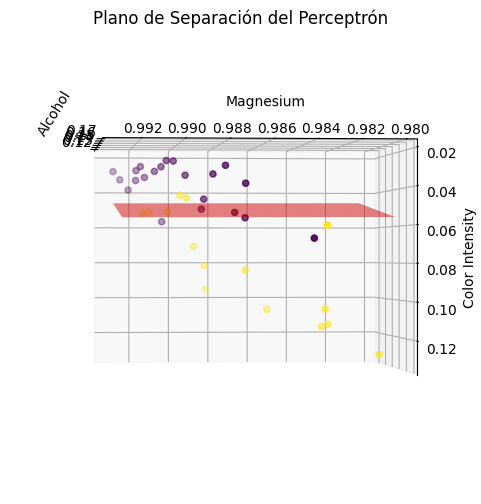

Los pesos son: [-0.10271405 -0.0137679   0.55399581]


In [91]:
# Sacamos los valores de los pesos y el sesgo
w,b = perceptronSimple.getWeightAndBias()

# Creamos una figura 3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los datos de prueba
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c= Y_test)

# Agregamos los nombres de los ejes
ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_zlabel('Color Intensity')
ax.set_title('Plano de Separación del Perceptrón')

# A partir de aquí graficaremos el plano de separación

# Creamos los valores de x_range & y_range basados en los valores de X_test
# Donde linspace crea un array de valores igualmente espaciados, usando el valor minimo y maximo de X_test
x_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50)
y_range = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50)

# Creamos los valores de x & y
# Donde meshgrid crea una matriz de coordenadas a partir de los vectores de coordenadas
x, y = np.meshgrid(x_range, y_range)

# Calculamos los valores de Z usando la ecuación del plano
z = (-w[0] * x - w[1] * y - b) / w[2]

# Graficamos el plano, donde alpha es la transparencia del plano
ax.plot_surface(x, y, z, alpha=0.6, color= 'Red')

# Rotamos la grafica
ax.view_init(-180,185)

# Mostramos la figura
plt.show()

# Mostramos los pesos y el sesgo
print("Los pesos son:", w)

## Paso 6: Evaluar el desempeño del algoritmo y mostrar ese desempeño a traves de una matriz de confusión.

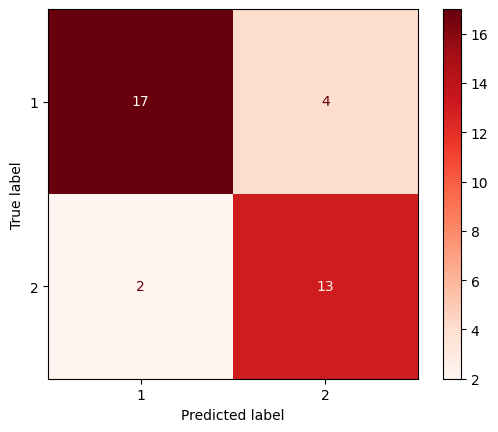

In [92]:
# Obtenemos los nombres de las clases
class_names = np.unique(Y_test)

# Creamos una instancia de la clase ConfusionMatrixDisplay, la cual nos permite graficar la matriz de confusión.
display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred), display_labels= class_names)

# Graficamos la matriz de confusión
display.plot(cmap= "Reds")
plt.show()

## Paso 7: Usar un clasificador binario basado en el Percentrón de scikit-learn y comparar los resultados con el algoritmo implementado en el paso 5.

- Utilizando de la libreria sklearn el algoritmo de perceptron simple, se prueba el algoritmo con el conjunto de datos de entrenamiento y se evalua con el conjunto de datos de prueba.

In [93]:
# Creamos una instancia de Perceptron
perceptron = Perceptron()

# Entrenamos el modelo
perceptron.fit(X_train, Y_train)

# Predecimos los valores de prueba
Y_pred = perceptron.predict(X_test)

# Calculamos el error de clasificación
error = np.mean(Y_pred != Y_test)

print("El error es de: ", error)

El error es de:  0.19444444444444445


### Evaluamos el desempeño con una matriz de confusión:

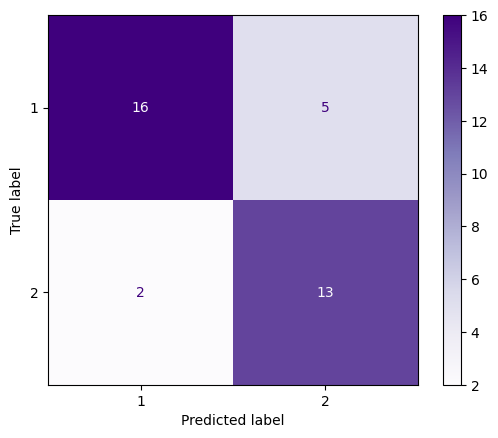

In [94]:
# Creamos una instancia de la clase ConfusionMatrixDisplay, la cual nos permite graficar la matriz de confusión.
display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred), display_labels=perceptron.classes_)

# Graficamos la matriz de confusión
display.plot(cmap= "Purples")
plt.show()